In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

def plot_file_ios(ax, file, title):
    x, y, z, g, t = zip(*[
        tuple(line.split(sep=",")[:5])
        for line in open(file)
    ][1:])
    
    x = [float(i) for i in x][::-1]
    y = [float(i) for i in y][::-1]
    z = [float(i) for i in z][::-1]
    g = [float(i) for i in g][::-1]
    t = [float("0." + i.split(sep=".")[1]) for i in t][::-1]
    
    secs = 0
    for i in range(1, len(t)):
        if t[i] < t[i - 1]:
            secs += 1
        t[i] += secs

    xm = [0] * len(x)
    for i, xi in enumerate(x):
        xm[i] = (xm[i - 1] * i + x[i]) / (i + 1.0)
    ym = [0] * len(y)
    for i, yi in enumerate(y):
        ym[i] = (ym[i - 1] * i + y[i]) / (i + 1.0)
    zm = [0] * len(z)
    for i, zi in enumerate(z):
        zm[i] = (zm[i - 1] * i + z[i]) / (i + 1.0)
        
    ax.plot(t, x, color=(1, 0, 0, 0.2))
    ax.plot(t, y, color=(0, 1, 0, 0.2))
    ax.plot(t, z, color=(0, 0, 1, 0.2))

    ax.plot(t, xm, color=(1, 0, 0))
    ax.plot(t, ym, color=(0, 1, 0))
    ax.plot(t, zm, color=(0, 0, 1))

    ax.set_ylim([-2, 2])
    ax.set_title(title)

def plot_file_android(ax, file, title):
    t, x, y, z = zip(*[
        tuple(line.split(sep=","))
        for line in open(file)
    ][1:])
    
    x = [float(i) for i in x]
    y = [float(i) for i in y]
    z = [float(i) for i in z]
    t = [float(i) for i in t]

    xm = [0] * len(x)
    for i, xi in enumerate(x):
        xm[i] = (xm[i - 1] * i + x[i]) / (i + 1.0)
    ym = [0] * len(y)
    for i, yi in enumerate(y):
        ym[i] = (ym[i - 1] * i + y[i]) / (i + 1.0)
    zm = [0] * len(z)
    for i, zi in enumerate(z):
        zm[i] = (zm[i - 1] * i + z[i]) / (i + 1.0)
        
    ax.plot(t, x, color=(1, 0, 0, 0.2))
    ax.plot(t, y, color=(0, 1, 0, 0.2))
    ax.plot(t, z, color=(0, 0, 1, 0.2))

    ax.plot(t, xm, color=(1, 0, 0))
    ax.plot(t, ym, color=(0, 1, 0))
    ax.plot(t, zm, color=(0, 0, 1))

    ax.set_ylim([-2, 2])
    ax.set_title(title)

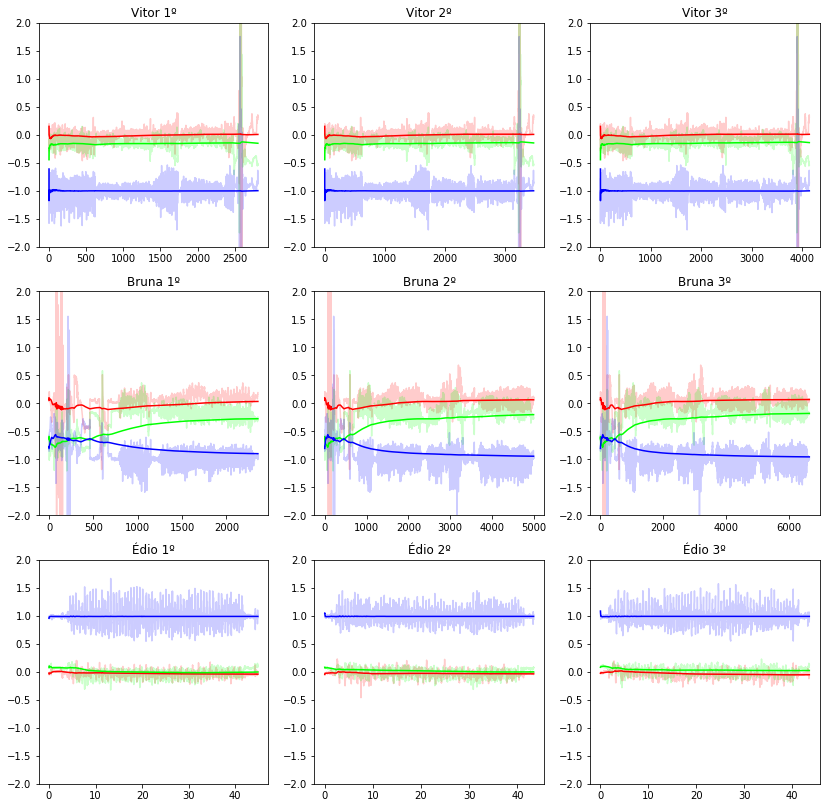

In [2]:
fig, ((ax11, ax12, ax13), (ax21, ax22, ax23), (ax31, ax32, ax33)) = plt.subplots(3, 3, figsize=(14, 14))

plot_file_ios(ax11, "./data/mru.vitor.1.csv", "Vitor 1º")
plot_file_ios(ax12, "./data/mru.vitor.2.csv", "Vitor 2º")
plot_file_ios(ax13, "./data/mru.vitor.3.csv", "Vitor 3º")

plot_file_ios(ax21, "./data/mru.bruna.1.csv", "Bruna 1º")
plot_file_ios(ax22, "./data/mru.bruna.2.csv", "Bruna 2º")
plot_file_ios(ax23, "./data/mru.bruna.3.csv", "Bruna 3º")

plot_file_android(ax31, "./data/mru.édio.1.csv", "Édio 1º")
plot_file_android(ax32, "./data/mru.édio.2.csv", "Édio 2º")
plot_file_android(ax33, "./data/mru.édio.3.csv", "Édio 3º")

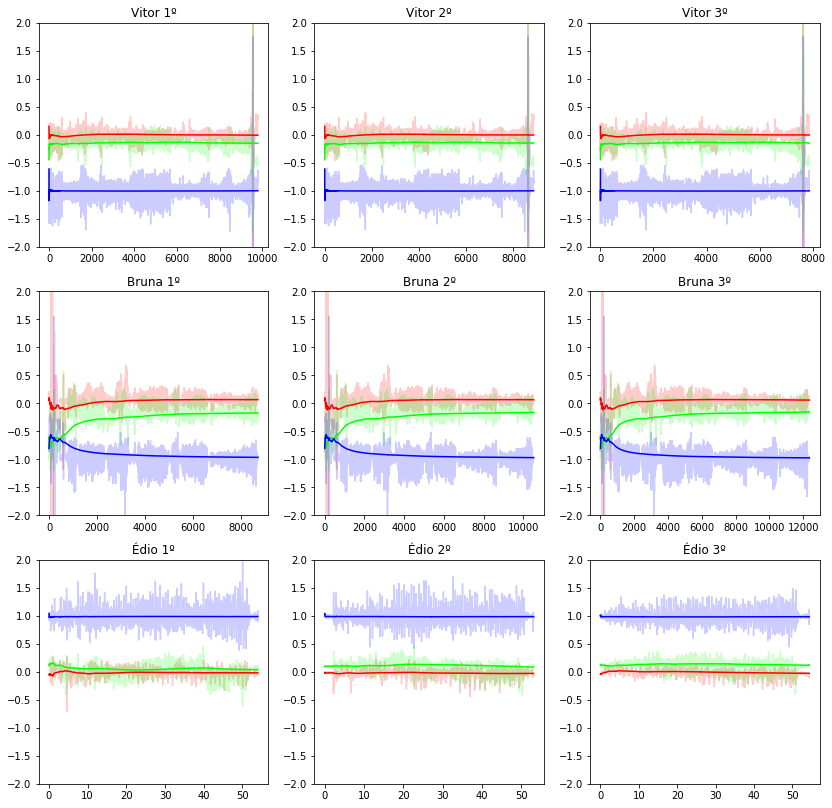

In [3]:
fig, ((ax11, ax12, ax13), (ax21, ax22, ax23), (ax31, ax32, ax33)) = plt.subplots(3, 3, figsize=(14, 14))

plot_file_ios(ax11, "./data/mruv.vitor.1.csv", "Vitor 1º")
plot_file_ios(ax12, "./data/mruv.vitor.2.csv", "Vitor 2º")
plot_file_ios(ax13, "./data/mruv.vitor.3.csv", "Vitor 3º")

plot_file_ios(ax21, "./data/mruv.bruna.1.csv", "Bruna 1º")
plot_file_ios(ax22, "./data/mruv.bruna.2.csv", "Bruna 2º")
plot_file_ios(ax23, "./data/mruv.bruna.3.csv", "Bruna 3º")

plot_file_android(ax31, "./data/mruv.édio.1.csv", "Édio 1º")
plot_file_android(ax32, "./data/mruv.édio.2.csv", "Édio 2º")
plot_file_android(ax33, "./data/mruv.édio.3.csv", "Édio 3º")

In [4]:
from math import sqrt

data = dict()

data["precision"] = [x for x in range(0, 31)]
data["paired"] = [10, 20, 30]
data["alternate"] = [5, 10, 15, 20, 25, 30]

data["color"] = dict()

data["color"]["model"] = (0, 0, 0, 0.5)
data["color"]["vitor"] = (1, 0, 0)
data["color"]["bruna"] = (0, 1, 0)
data["color"]["édio"] = (0, 0, 1)

data["mru"] = dict()
data["mruv"] = dict()

#96tick/m = 1.6tick/s
#v = 0.5m/tick = 0.5*1.6m/s
#v = 0.5*1.6m/s = x/t
#t = x/(0.5*1.6)s
#data["mru"]["model"] = [10/(0.5*1.6), 20/(0.5*1.6), 30/(0.5*1.6)]

def mru(x):
    return x / (0.5 * 1.6)

def mruv(x):
    return sqrt(2 * x / (0.01 * (1.6 ** 2) ))

def vmruv(x):
    return sqrt(2 * (0.01 * (1.6 ** 2)) * x)
    

#96tick/m = 1.6tick/s
#v0 = 0cm/tick
#a = 1cm/tick^2 = 0.01*1.6m/s^2
#x = 0.01*1.6*(t**2)/2m
#t = sqrt(2x/(0.01*1.6))
#data["mruv"]["model"] = [sqrt(2*10/(0.01*(1.6**2))), sqrt(2*20/(0.01*(1.6**2))), sqrt(2*30/(0.01*(1.6**2)))]

data["mru"]["vitor"] = dict()
data["mru"]["bruna"] = dict()
data["mru"]["édio"] = dict()

data["mruv"]["vitor"] = dict()
data["mruv"]["bruna"] = dict()
data["mruv"]["édio"] = dict()


data["mru"]["vitor"]["paired1"] = [(11.1+11.05)/2, (23.4+22.15)/2, (33.43+33.79)/2]
data["mru"]["vitor"]["paired2"] = [(11.73+11.79)/2, (22.67+22.82)/2, (33.6+33.54)/2]
data["mru"]["vitor"]["alternate"] = [9.05, 12.3, 19.92, 25.75, 32.29, 38.51]
data["mru"]["bruna"]["paired1"] = [(11.34+11.21)/2, (21.03+21.08)/2, (30.67+30.4)/2]
data["mru"]["bruna"]["paired2"] = [(13.39+16.66)/2, (24.64+24.52)/2, (36.56+36.46)/2]
data["mru"]["bruna"]["alternate"] = [6.32, 11.41, 16.24, 21.19, 25.97, 30.58]
data["mru"]["édio"]["paired1"] = [(12.58+12.75)/2, (25.63+25.47)/2, (38.05+38.37)/2]
data["mru"]["édio"]["paired2"] = [(13.27+13.33)/2, (25.84+25.74)/2, (37.91+37.81)/2]
data["mru"]["édio"]["alternate"] = [6.52, 13.42, 19.61, 25.34, 31.43, 37.57]

data["mruv"]["vitor"]["paired1"] = [(28.06+27.23)/2, (39.08+39.18)/2, (48.01+48.17)/2]
data["mruv"]["vitor"]["paired2"] = [(27.76+27.89)/2, (39.3+38.32)/2, (48.11+48.03)/2]
data["mruv"]["vitor"]["alternate"] = [19.8, 27.71, 34.51, 38.96, 43.73, 47.93]
data["mruv"]["bruna"]["paired1"] = [(27.78+27.72)/2, (39.03+38.53)/2, (47.6+47.48)/2]
data["mruv"]["bruna"]["paired2"] = [(27.21+27.34)/2, (38.36+38.6)/2, (46.92+47.01)/2]
data["mruv"]["bruna"]["alternate"] = [19.84, 27.95, 33.63, 39.2, 43.39, 47.72]
data["mruv"]["édio"]["paired1"] = [(27.68+27.81)/2, (38.91+39.09)/2, (46.61+47.47)/2]
data["mruv"]["édio"]["paired2"] = [(28.92+27.51)/2, (38.93+39.09)/2, (48.05+48.08)/2]
data["mruv"]["édio"]["alternate"] = [19.04, 27.19, 33.48, 38.3, 43.59, 47.85]

In [5]:
import matplotlib.pyplot as plt
import io
import urllib, base64
import ipywidgets as widgets
from IPython.display import clear_output

def plot_data(movement, function, person):
    plt.gca().set_xlim([0, maxX])
    plt.gca().set_ylim([0, maxY])
    
    plt.xlabel("t (s)")
    plt.ylabel("x(t) (m)")

    plt.plot([function(x) for x in data["precision"]], data["precision"], color=data["color"]["model"], linestyle="--")

    plt.scatter(data[movement][person]["paired1"], data["paired"], color=data["color"][person])
    plt.scatter(data[movement][person]["paired2"], data["paired"], color=data["color"][person])
    plt.scatter(data[movement][person]["alternate"], data["alternate"], color=data["color"][person])
    
def plot_vm(person):
    plt.plot([0, data["mru"][person]["paired1"][-1]], [0, data["paired"][-1]], color=data["color"][person]+(0.2,))
    plt.plot([0, data["mru"][person]["paired2"][-1]], [0, data["paired"][-1]], color=data["color"][person]+(0.2,))
    plt.plot([0, data["mru"][person]["alternate"][-1]], [0, data["alternate"][-1]], color=data["color"][person]+(0.2,))

def get_vms(person):
    return (data["paired"][-1]/data["mru"][person]["paired1"][-1], data["paired"][-1]/data["mru"][person]["paired2"][-1], data["paired"][-1]/data["mru"][person]["alternate"][-1])

def get_vms_errs(person):
    vms = get_vms(person)
    errs = [0] * len(vms)
    
    for i, t in enumerate(data["mru"][person]["paired1"]):
        errs[0] += ((t - data["paired"][i]*(vms[0]**-1))**2/data["paired"][i]*(vms[0]**-1))/len(data["mru"][person]["paired1"])
    for i, t in enumerate(data["mru"][person]["paired2"]):
        errs[1] += ((t - data["paired"][i]*(vms[1]**-1))**2/data["paired"][i]*(vms[1]**-1))/len(data["mru"][person]["paired2"])
    for i, t in enumerate(data["mru"][person]["alternate"]):
        errs[2] += ((t - data["alternate"][i]*(vms[2]**-1))**2/data["alternate"][i]*(vms[2]**-1))/len(data["mru"][person]["alternate"])
        
    return errs

def get_mru_errs(person):
    vms = get_vms(person)
    errs = [0] * len(vms)
    
    for i, t in enumerate(data["mru"][person]["paired1"]):
        errs[0] += ((t - mru(data["paired"][i]))**2/mru(data["paired"][i]))/len(data["mru"][person]["paired1"])
    for i, t in enumerate(data["mru"][person]["paired2"]):
        errs[1] += ((t - mru(data["paired"][i]))**2/mru(data["paired"][i]))/len(data["mru"][person]["paired2"])
    for i, t in enumerate(data["mru"][person]["alternate"]):
        errs[2] += ((t - mru(data["alternate"][i]))**2/mru(data["alternate"][i]))/len(data["mru"][person]["alternate"])
        
    return errs

def avg_lists(lists):
    sz = len(lists[0])
    l = [0] * sz
    
    for li in lists:
        for i, item in enumerate(li):
            l[i] += item/sz
            
    return l

def get_html_table(title, cols):
    html = "<table style=\"min-width: 300px\">"
    html += "<tr><th colspan=2>" + title + "</th></tr>"
    
    for row in range(len(cols[0])):
        html += "<tr>"
        for col in range(len(cols)):
            html += "<td style=\"border: 1px solid black; padding: 5px;\">{0}</td>".format(cols[col][row])
        html += "</tr>"

    html += "</table>"
    return html            


def get_vm_table(person):
    html = "<table style=\"display: inline;\">"
    html += "<th colspan=2>Velocidades médias</th>"
    html += "<tr><td>pareado 1:</td><td>" + str(data["paired"][-1]/data["mru"][person]["paired1"][-1]) + "</td></tr>"
    html += "<tr><td>pareado 2:</td><td>" + str(data["paired"][-1]/data["mru"][person]["paired2"][-1]) + "</td></tr>"
    html += "<tr><td>alternado:</td><td>" + str(data["paired"][-1]/data["mru"][person]["alternate"][-1]) + "</td></tr>"
    html += "</table>"
    return html

def get_vm_table_all():
    html = "<table style=\"display: inline;\">"
    html += "<th colspan=2>Velocidades médias</th>"
    html += "<tr><td>pareado 1:</td><td>" + str(3*data["paired"][-1]/(data["mru"]["vitor"]["paired1"][-1]+data["mru"]["bruna"]["paired1"][-1]+data["mru"]["édio"]["paired1"][-1])) + "</td></tr>"
    html += "<tr><td>pareado 2:</td><td>" + str(3*data["paired"][-1]/(data["mru"]["vitor"]["paired2"][-1]+data["mru"]["bruna"]["paired2"][-1]+data["mru"]["édio"]["paired2"][-1])) + "</td></tr>"
    html += "<tr><td>alternado:</td><td>" + str(3*data["paired"][-1]/(data["mru"]["vitor"]["alternate"][-1]+data["mru"]["bruna"]["alternate"][-1]+data["mru"]["édio"]["alternate"][-1])) + "</td></tr>"
    html += "</table>"
    return html

def center_html(html):
    return "<div style=\"text-align: center\">" + html + "</div>"

def get_html_from_plot():
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    fig.tight_layout()

    buf = io.BytesIO()
    fig.savefig(buf, format="png")
    buf.seek(0)
    string = base64.b64encode(buf.read())
    plt.clf()

    uri = "data:image/png;base64," + urllib.parse.quote(string)
    return "<img style=\"display: inline;\" src=\"%s\"/>" % uri
    #return "<img style=\"display: block; margin: 0 auto;\" src=\"%s\"/>" % uri

In [6]:
from IPython.display import display, Math, Latex

display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))

htmls = []

maxX = 40
maxY = 35

plot_data("mru", mru, "vitor")
plot_vm("vitor")
htmls.append(center_html( 
    get_html_from_plot() + "<div style=\"display: inline-block; vertical-align: middle;\">" +
    get_html_table("Velocidades médias (m/s²)", [["pareado 1", "pareado 2", "alternado"], get_vms("vitor")]) + 
    get_html_table("Erros médios à vm (%)", [["pareado 1", "pareado 2", "alternado"], get_vms_errs("vitor")]) + 
    get_html_table("Erros médios ao modelo (%)", [["pareado 1", "pareado 2", "alternado"], get_mru_errs("vitor")]) + 
    "</div>"
))
plot_data("mru", mru, "bruna")
plot_vm("bruna")
htmls.append(center_html(
    get_html_from_plot() + "<div style=\"display: inline-block; vertical-align: middle;\">" +
    get_html_table("Velocidades médias (m/s²)", [["pareado 1", "pareado 2", "alternado"], get_vms("bruna")]) + 
    get_html_table("Erros médios à vm (%)", [["pareado 1", "pareado 2", "alternado"], get_vms_errs("bruna")]) + 
    get_html_table("Erros médios ao modelo (%)", [["pareado 1", "pareado 2", "alternado"], get_mru_errs("bruna")]) + 
    "</div>"
))
plot_data("mru", mru, "édio")
plot_vm("édio")
htmls.append(center_html(
    get_html_from_plot() + "<div style=\"display: inline-block; vertical-align: middle;\">" +
    get_html_table("Velocidades médias (m/s²)", [["pareado 1", "pareado 2", "alternado"], get_vms("édio")]) + 
    get_html_table("Erros médios à vm (%)", [["pareado 1", "pareado 2", "alternado"], get_vms_errs("édio")]) + 
    get_html_table("Erros médios ao modelo (%)", [["pareado 1", "pareado 2", "alternado"], get_mru_errs("édio")]) + 
    "</div>"
))
plot_data("mru", mru, "vitor")
plot_vm("vitor")
plot_data("mru", mru, "bruna")
plot_vm("bruna")
plot_data("mru", mru, "édio")
plot_vm("édio")
htmls.append(center_html(
    get_html_from_plot() + "<div style=\"display: inline-block; vertical-align: middle;\">" +
    get_html_table("Velocidades médias (m/s²)", [["pareado 1", "pareado 2", "alternado"], avg_lists([get_vms("vitor"), get_vms("bruna"), get_vms("édio")])]) + 
    get_html_table("Erros médios à vm (%)", [["pareado 1", "pareado 2", "alternado"], avg_lists([get_vms_errs("vitor"), get_vms_errs("bruna"), get_vms_errs("édio")])]) + 
    get_html_table("Erros médios ao modelo (%)", [["pareado 1", "pareado 2", "alternado"], avg_lists([get_mru_errs("vitor"), get_mru_errs("bruna"), get_mru_errs("édio")])]) + 
    "</div>"
))

tab = widgets.Tab()
tab.children = [widgets.HTML(value=html) for html in htmls]
for i, title in enumerate(["Vitor", "Bruna", "Édio", "Todos"]):
    tab.set_title(i, title)

plt.show()
clear_output()
display(tab)

# (x - a*t)**2' = 2*x*t + 2*a*(t**2)

Tab(children=(HTML(value='<div style="text-align: center"><img style="display: inline;" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAbAAAAGwCAYAAADITjAqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzs3XdwlfeZL/DvUa%2BggroQQkLNErJAEqKDmuNCiQHbGIxx8IS98d3sxknmrneZSZyZm6w9u8nGk3LX2hgXIYpxw3ZwQQgwHQSIZooQEuq9lyOd8t4/HgshJIwkznmPztH3M%2BMxOfVnx%2BjL732f5/lpFEVRQEREZGXsLL0AIiKisWCAERGRVWKAERGRVWKAERGRVWKAERGRVWKAERGRVWKAERGRVWKAERGRVWKAERGRVWKAERGRVVItwLRaLebMmYOHH34Y8fHx%2BPWvfw0AeOGFFzB9%2BnQkJSUhKSkJRUVFai2JiIismINaX%2BTs7IyCggJ4eHhAp9Nh4cKFeOyxxwAA//Ef/4E1a9aotRQiIrIBqu3ANBoNPDw8AAA6nQ46nQ4ajUatryciIhuj6j0wg8GApKQk%2BPv7Izs7G2lpaQCALVu2IDExES%2B//DJ6e3vVXBIREVkpjSWOU2ltbcWTTz6JP/3pT/D19UVgYCD6%2BvqwefNmREZG4le/%2BtWQ9%2BTk5CAnJwcAcPXqVcTGxqq9bCIiMpGysjI0NjY%2B0GdYJMAA4De/%2BQ3c3d3xy1/%2B8vZjBw8exH/%2B53/i888//973pqSkoLCw0NxLJCIiMzHFz3HVLiE2NDSgtbUVANDT04P8/HzExsaipqYGAKAoCj755BMkJCSotSQiIrJiqlUh1tTUYOPGjTAYDDAajXj66aexbNkyZGRkoKGhAYqiICkpCf/93/%2Bt1pKIiMiKqRZgiYmJOHfu3JDHCwoK1FoCERHZEE7iICIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq8QAIyIiq6RagGm1WsyZMwcPP/ww4uPj8etf/xoAUFpairS0NERFReGZZ55BX1%2BfWksiIiIrplqAOTs7o6CgAOfPn0dRURG%2B/PJLnDhxAv/yL/%2BCl19%2BGcXFxfD29sZbb72l1pKIiCwvLw%2BYMgXQaOSvKVPksfEuLw8IDwfs7OTvFlizagGm0Wjg4eEBANDpdNDpdNBoNCgoKMCaNWsAABs3bsQnn3yi1pKIiCwrLw/YtAloahp4rKkJ%2BNGPxneI5eUBmzcDt24BiiJ/37xZ9TWreg/MYDAgKSkJ/v7%2ByM7ORmRkJLy8vODg4AAACA0NRVVVlZpLIiKynC1bgOFum%2Bh08pwFGY3Gez%2B5ZQvQ3T34se5u1desaoDZ29ujqKgIlZWVOHXqFK5cuTLkNRqNZtj35uTkICUlBSkpKWhoaDD3UomIzK%2B8fGzPmdmZM2fwt7/9DVqtdvgX3GttKq/ZIlWIXl5eWLp0KU6cOIHW1lbo9XoAQGVlJYKDg4d9z%2BbNm1FYWIjCwkL4%2BfmpuVwiIvOYOvXez4WFqbeOOxw5cgSfffYZ3N3dYW9vP/yLQkOHf1zlNasWYA0NDWhtbQUA9PT0ID8/H3FxcUhPT8cHH3wAAHj33XexcuVKtZZERGRZ/%2Bt/AcOFhKMj8Nvfqr6cgoIC5OfnY%2BbMmVi7di0cHR2Hvqi1FfiHfwBcXAY/7uam%2BppVC7Camhqkp6cjMTERqampyM7OxrJly/D666/jD3/4A2bMmIGmpia8%2BOKLai2JiMhyLl2SHcsrrwA%2BPgOP%2B/oCb78NrF%2Bv%2BpKCgoKQlpaGVatWDb/7amwESkqA1auBN98Epk2Tyslp04CcHNXXrFEURVH1G00gJSUFhYWFll4GEdHYXLkCnD0LhIQACxcC3xWyWYJer0dlZSXCw8O//4U1NUB1NTBpEhAZKeXzD8AUP8c5iYOISE3Xrkl4BQZaPLx6e3uxfft25Obm3r7FM4SiSHFGdbXsDmfMeODwMhXL/ZsjIppoSkqAM2cAf39g8WKLhld3dzfy8vJQU1ODlStXwsvLa%2BiLjEagrAxoaQECAu5dvGEhDDAiIjWUlgInT8ouZskSKdSwkPb2duTm5qKlpQXPPPMMYmJihr7IYJDA7eiQ4AoIUH%2Bh98EAIyIyt/Jy4MQJwNtbwsvJyaLLuXTpEtrb2/Hcc88Nf%2B9LpwOKiwGtFpg%2BfXCRyTjCACMiMqfKSuDYMWDyZGDp0qHl5yoyGo2ws7PDvHnz8NBDDw1/2VCrlfDS6%2BV%2B16RJ6i90hMbHnTgiIltUXQ0cPQq4uwPp6YCrq8WWcuvWLfz5z39GY2MjNBrN8OHV1SVFJkYjEBMzrsMLYIAREZlHbS1w%2BLDsuDIyLBpe169fR25uLuzs7IZvTgaAtjbg%2BnVprI6NlcbkcY6XEImITK2hAfjmm4Hwcne32FIuXLiATz75BIGBgXjuuefgNlwwNTXJRHlXV7lsaMECk9FggBERmVJTE3DwoJTIL10KeHpabCnXrl3DRx99hOnTp2Pt2rVwdnYe%2BqLaWqCqStYZGTn8aKtxigFGRGQqzc3AgQPS6JuRIYUbFhQREYElS5Zg0aJFt4%2BtGqSiAqivlyrD8HAZC2VFeA%2BMiMgU2tpk5wVIwcZwRRIqUBQFx44dg1arhaOjI9LT04eGl6JIX1p9vTRVT59udeEFcAdGRPTgOjqAggJp/s3IsFjflMFgwJ49e3DhwgU4OjoiNTV1uBcBN28C7e0yizEwUP2FmggDjIjoQXR2SnjpdHLPy9fXIsvQ6XT44IMPcO3aNWRkZCAlJWW4FwE3bgA9PXLJ0EJrNRUGGBHRWHV1SXhptTJhw9/fIsvQarXYsWMHysvL8cQTTwy/8%2BrtlQZlnU6KNSx8f84UGGBERGPR0yPh1d0tg3kteCmur68PHR0dWLVqFWbOnDn0Bd3dEl4AEB1t0bJ%2BU2KAERGNllYr1YZdXcCCBUBwsEWW0dnZCTc3N0yaNAkvvfTS8JWG7e0ylNfBAYiKsugoK1NjFSIR0Wj09kp4tbUBc%2BcCU6daZBkNDQ3IyclBfn4%2BAAwfXs3Ncs/L2Vmma9hQeAHcgRERjZxOBxw6JOdjzZ0rhRAWUFVVhby8PNjZ2eHhhx8e/kX19dLn5eEh0zWsqEF5pBhgREQj0R9eDQ1AWhoQEWGRZZSWlmLHjh1wd3fHhg0b4DNcyX5VlUzY8PKSHq9xcoKyqTHAiIjuR6%2BXwbx1dUBKiuxoLECr1WLXrl3w8vLChg0b4Hn3mCpFkZmGTU2An59c3rTCBuWRYoAREX0fg0GORKmpAWbPlmNGLMTFxQVr165FQEAAXO%2Bebm80SoNyW5sUlQQFWWaRKmKAERHdS394VVYCiYlAXJxFlnHs2DG4uLhg9uzZw5%2BgrNdLsUZXFzBtGjBliuprtATbvDBKRPSgjEbgxAkphJg5U/5SmaIo2L9/P77%2B%2Bmv

In [7]:
htmls = []

maxX = 50
maxY = 35

plot_data("mruv", mruv, "vitor")
htmls.append(get_html_from_plot())
plot_data("mruv", mruv, "bruna")
htmls.append(get_html_from_plot())
plot_data("mruv", mruv, "édio")
htmls.append(get_html_from_plot())
plot_data("mruv", mruv, "vitor")
plot_data("mruv", mruv, "bruna")
plot_data("mruv", mruv, "édio")
htmls.append(get_html_from_plot())

tab = widgets.Tab()
tab.children = [widgets.HTML(value=html) for html in htmls]
for i, title in enumerate(["Vitor", "Bruna", "Édio", "Todos"]):
    tab.set_title(i, title)

plt.show()
clear_output()
display(tab)

Tab(children=(HTML(value='<img style="display: inline;" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAbAAAAGwCAYAAADITjAqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzt3XtUVOeh/vFnuAkoCiooFxVFVAQUI0qMjfGG8RaslxgTk5ia1HN6SXPp6a%2Beek6brpWkOT1N26w2zQlt2mMM0TbJ8RLjXTRaDbWDQZN4iVVBVCKgIspFYNi/P6zTGm%2BgMO/s4ftZi6WzZwYetmvm8d3z7nc7LMuyBACAzfiZDgAAwK2gwAAAtkSBAQBsiQIDANgSBQYAsCUKDABgSxQYAMCWKDAAgC1RYAAAW6LAAAC25LECq62t1fDhwzV48GAlJyfrRz/6kSTpscceU%2B/evZWWlqa0tDQVFBR4KhIAwMYCPPWD2rVrp9zcXHXo0EH19fX6yle%2BokmTJkmS/vu//1uzZs3yVBQAgA/w2AjM4XCoQ4cOkqT6%2BnrV19fL4XB46scDAHyMRz8Dc7lcSktLU1RUlDIzM5WRkSFJWrRokQYNGqRnnnlGFy9e9GQkAIBNOUxcTqWiokLTp0/Xr371K3Xp0kXdu3dXXV2dFixYoISEBP3whz%2B86jnZ2dnKzs6WJB04cEADBgzwdGwAQAspLCxUeXn5bX0PIwUmST/%2B8Y/Vvn17/du//Zt729atW/Wzn/1Mq1evvuFz09PT5XQ6WzsiAKCVtMT7uMcOIZaVlamiokKSVFNTo02bNmnAgAEqKSmRJFmWpRUrViglJcVTkQAANuaxWYglJSWaN2%2BeXC6XGhsbNXv2bE2dOlVjx45VWVmZLMtSWlqa/ud//sdTkQAANuaxAhs0aJA%2B/vjjq7bn5uZ6KgIAwIewEgcAwJYoMACALVFgAABbosAAALZEgQEAbIkCAwDYEgUGALAlCgwAYEsUGADAligwAIAtUWAAAFuiwAAAtkSBAQBsiQIDANgSBQYAsCUKDABgSxQYAMCWKDAAgC1RYAAAW6LAAAC2RIEBAGyJAgMA2BIFBgCwJQoMAGBLFBgAwJYoMACALVFgAABbosAAALZEgQEAbIkCAwDYEgUGALAlCgwAYEsUGADAligwAIAtUWAAAFuiwAAAtkSBAQBsiQIDANgSBQYAsCUKDABgSxQYAMCWKDAAgC1RYAAAW6LAAAC25LECq62t1fDhwzV48GAlJyfrRz/6kSTp6NGjysjIUGJioh544AHV1dV5KhIAwMY8VmDt2rVTbm6u9uzZo4KCAq1bt055eXn6/ve/r2eeeUaHDh1SRESE3njjDU9FAgDcipwcKSxMcjguffn5Sd/8psdjeKzAHA6HOnToIEmqr69XfX29HA6HcnNzNWvWLEnSvHnztGLFCk9FAgA0V06O9Nhj0oUL/9hmWdJrr3m8xDz6GZjL5VJaWpqioqKUmZmphIQEhYeHKyAgQJIUFxenEydOeDISAKA5Fi2SGhqufV92tkejeLTA/P39VVBQoOPHj2vXrl3av3//VY9xOBzXfG52drbS09OVnp6usrKy1o4KALiWY8euuGlJekfSfklyuTwaxcgsxPDwcI0ePVp5eXmqqKhQw9/b/Pjx44qJibnmcxYsWCCn0ymn06nIyEhPxgUAXNaz5xU3T0raJ6lWkvz9PRrFYwVWVlamiooKSVJNTY02bdqkpKQkjRkzRu%2B%2B%2B64kafHixZo2bZqnIgEAmuuFF6S/f%2BwjSbGS/lXSYElasMCjUQJu/pCWUVJSonnz5snlcqmxsVGzZ8/W1KlTNXDgQM2ZM0f/8R//oSFDhujxxx/3VCQAQHPNnXvpz3/9V1VfuKBQSd0cDulf/1X6zW88GsVhWZbl0Z/YAtLT0%2BV0Ok3HAIA2q6qqSr/61a80ZswYZWRkNPv5LfE%2BzkocAIBm27p1q%2Brq6pSQkGAsAwUGAGiW0tJSOZ1Opaenq2vXrsZyUGAAgGbZuHGj2rVrp9GjRxvNQYEBAJqsoqJCRUVFGjVqlEJDQ41m8dgsRACA/YWHh%2BvJJ59USEiI6SiMwAAATXPu3DlZlqWwsDD3EoAmUWAAgJu6ePGisrOztX79etNR3CgwAMBNbdu2TVVVVRo0aJDpKG4UGADghs6cOaO8vDylpaVdd71aEygwAMANbdy4Uf7%2B/ho3bpzpKFegwAAA11VdXa0TJ07o7rvvVlhYmOk4VzA/jQQA4LVCQ0P17W9/W35%2B3jfe8b5EAACvcOrUKTU0NCgoKMgrps1/GQUGALhKbW2t3nzzTa1cudJ0lOuiwAAAV9m%2Bfbuqq6s1YsQI01GuiwIDAFzh8rT5wYMHe9W0%2BS%2BjwAAAV/DWafNfRoEBANzq6upUWVnpldPmv8z7ppUAAIwJCgrSE088ocbGRtNRbooRGABAknT06FFVV1fL4XDI39/fdJybosAAAKqurtYf//hHvf/%2B%2B6ajNBkFBgBQbm6u6urqNHbsWNNRmowCA4A27osvvlB%2Bfr6GDRumyMhI03GajAIDgDbMsiytXbtWISEhGj16tOk4zcIsRABow%2Brr69WhQwelpqYqJCTEdJxmocAAoA0LCgrS/fffL8uyTEdpNg4hAkAb9cknn6isrEyS5HA4DKdpPgoMANqgiooKrVy5Utu2bTMd5ZZRYADQBq1fv14Oh0Pjx483HeWWUWAA0MYcPnxY%2B/fv16hRo9SpUyfTcW4ZBQYAbYjL5dLatWvVuXNnr77WV1MwCxEA2pDGxkb1799f8fHxCgiwdwXYOz0AoFkCAwOVmZlpOkaL4BAiALQRubm5OnLkiOkYLYYCA4A2oKioSNu2bVNRUZHpKC2GAgMAH9fY2Kg1a9aoU6dO%2BspXvmI6TouhwADAxzmdTp06dUr33nuvAgMDTcdpMRQYAPiwqqoq5ebmqk%2BfPkpKSjIdp0UxCxEAfFhISIjGjx%2BvXr162XK9wxuhwADAR1mWJT8/P6Wnp5uO0io4hAgAPqixsVFLlizRp59%2BajpKq6HAAMAH/fWvf9WRI0fk5%2Be7b/O%2B%2B5sBQBt14cIF5ebmKiEhwecmbvwzCgwAfMyGDRvU0NCgyZMn%2B9zEjX9GgQGADyktLdXevXs1cuRIdenSxXScVuWxAisuLtaYMWOUlJSk5ORkvfLKK5Kk5557TrGxsUpLS1NaWprWrFnjqUgA4HOioqL0yCOP6O677zYdpdV5rMACAgL08ssva//%2B/crLy9Orr76qffv2SZKeeeYZFRQUqKCgQJMnT/ZUJACwp5wcKT5e8vO79GdOjiSprq5OkpSQkOBTK25cj8fOA4uOjlZ0dLQkKSwsTElJSTpx4oSnfjwA%2BIacHGnBAqm6%2BtLtoiJpwQJVVlfrtTNnNGnSJA0aNMhsRg8x8hlYYWGhPv74Y2VkZEiSfv3rX2vQoEGaP3%2B%2Bzp49ayISANjDokX/KK/Lqqu14Qc/UH19vXr06GEmlwEeL7ALFy5o5syZ%2BuUvf6mOHTvqG9/4hg4fPqyCggJFR0fru9/97jWfl52drfT0dKWnp6usrMzDqQHASxw7dtWmw5I%2BLS/X3XffrYiICM9nMsRhWZblqR9WX1%2BvqVOn6t5779Wzzz571f2FhYWaOnXqTc8cT09Pl9PpbK2YAOC94uMvHTb8u3pJr0lyREToG6WlCgiwxwqBLfE%2B7rERmGVZevzxx5WUlHRFeZWUlLj/vnz5cqWkpHgqEgDYzwsvSKGh7pvHJFUEBmrKf/6nbcqrpXjst92xY4eWLFmi1NRUpaWlSZJefPFFLV2

In [8]:
def avg(ls):
    r = [0] * len(ls[0])
    
    for i in range(len(ls)):
        for j in range(len(ls[i])):
            r[j] += ls[i][j] / len(ls)
            
    return r

def ualm_v(s, t):
    v = [0] * len(s)

    s = [0] + s
    t = [0] + t
    for i in range(1, len(s)):
        v[i-1] = (s[i] - s[i-1])/(t[i] - t[i-1])
    
    return v

def ualm_a(v, t):
    v = [0] + v
    t = [0] + t
    return (v[-1] - v[0])/(t[-1] - t[0])

c = dict()
c["M"] = (0, 0, 0)
c["V"] = (1, 0, 0)
c["B"] = (0, 1, 0)
c["E"] = (0, 0, 1)

m = dict()
m["A"] = dict()

m["A"]["a"] = 0.01 * (1.6**2)
m["A"]["t"] = [step/1.6          for step in range(1, 77+1)]
m["A"]["v"] = [m["A"]["a"]*t     for t in m["A"]["t"]]
m["A"]["s"] = [m["A"]["a"]*t*t/2 for t in m["A"]["t"]]

d = dict()
d["A"] = dict()
d["A"]["V"] = dict()

d["A"]["V"]["P1"] = dict()
d["A"]["V"]["P1"]["s"] = [10, 20, 30]
d["A"]["V"]["P1"]["t"] = avg([[28.06, 39.08, 48.01], [27.23, 39.18, 48.17]])
d["A"]["V"]["P1"]["v"] = ualm_v(d["A"]["V"]["P1"]["s"], d["A"]["V"]["P1"]["t"])
d["A"]["V"]["P1"]["a"] = ualm_a(d["A"]["V"]["P1"]["v"], d["A"]["V"]["P1"]["t"])

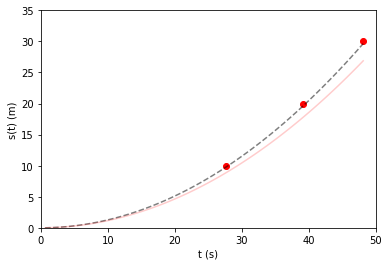

In [9]:
plt.gca().set_xlim([0, 50])
plt.gca().set_ylim([0, 35])
    
plt.xlabel("t (s)")
plt.ylabel("s(t) (m)")

plt.plot(m["A"]["t"], m["A"]["s"], color=c["M"]+(0.5,), linestyle="--")
plt.scatter(d["A"]["V"]["P1"]["t"], d["A"]["V"]["P1"]["s"], color=c["V"])
plt.plot(m["A"]["t"], [d["A"]["V"]["P1"]["a"]*t*t/2 for t in m["A"]["t"]], color=c["V"]+(0.2,))

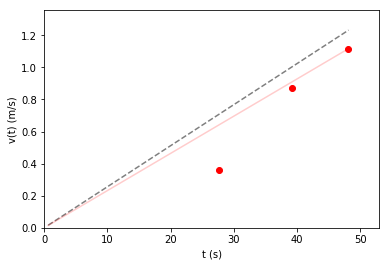

In [12]:
plt.axis([0, m["A"]["t"][-1]*1.1, 0, m["A"]["v"][-1]*1.1])
    
plt.xlabel("t (s)")
plt.ylabel("v(t) (m/s)")

plt.plot(m["A"]["t"], m["A"]["v"], color=c["M"]+(0.5,), linestyle="--")
plt.plot(d["A"]["V"]["P1"]["t"], d["A"]["V"]["P1"]["v"], color=c["V"], linestyle="", marker="o")
plt.plot(m["A"]["t"], [d["A"]["V"]["P1"]["a"]*t for t in m["A"]["t"]], color=c["V"]+(0.2,))